#**Stock Prediction analysis**

##Team: The Mean Squares

1. Jeyasri Subramanian [SJSU ID: 014510132]
2. Subarna Chowdhury Soma [SJSU ID: 014549587] 
3. Pranav Lodha [SJSU ID: 009468121]
4. Wasae Qureshi [SJSU ID: 014569880]

##**Contributions:**

1. Preprocessing/Correlation **[Subarna & Jeyasri]** 
2. Random Forest **[Pranav & Wasae]**
3. Data insights **[Team]**

#Data Analysis

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Mount Google drive


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Printing directory details
!ls '/content/drive/My Drive/MLSpring2020/'

 all_stocks_date.csv   compressed_financial_stmt.csv
 Assignment-1	       computed_data.csv
 Assignment-2	       computed_results.csv
 Assignment-3	       march_01_2020_complete_data.csv
 Assignment-4	      'Midterm Dataset'
 Assignment-5	       Presentation
 Assignment-6	      'ProjectRecording- March10'
 Assignment-7	      'Project Submission'
 Assignment-8	       stock_summary_data_28_02_2020_16_46_36.csv


##**Load Dataset**


In [0]:
stock_data =  pd.read_csv('/content/drive/My Drive/MLSpring2020/TheMeanSquares-StockPrediction/march_01_2020_complete_data.csv', low_memory =False)
print(stock_data.groupby('sector_code').size().sort_values(ascending=False))
top_sectors = [6, 7, 8, 10]
stock_data.head()

sector_code
6     770
7     414
8     293
10    292
2     235
9     190
4     154
1     127
0     118
3     107
11     53
5       3
dtype: int64


,net_profit_AYR,net_income_AYR,sector_code,stock_code,avg_yearly_returns,yearly_variance,percent_change_net_income,overall_change_market_cap,cluster,stability
0,0.054013,0.049454,8,3,0.374324,0.480449,276.411934,507.091595,0,1
1,-0.218812,-0.211026,6,5,0.089031,0.094460,-109.450979,-92.556070,0,1
2,0.183065,0.301298,10,6,0.136242,0.192417,-300.548651,-43.324559,0,1
3,0.201711,0.536071,10,8,0.298937,0.081963,-336.027178,428.088466,0,0
4,0.014789,0.254047,2,7,0.190711,0.101058,570.989678,281.521701,0,0


#Random Forest

##Multivariate Analysis

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


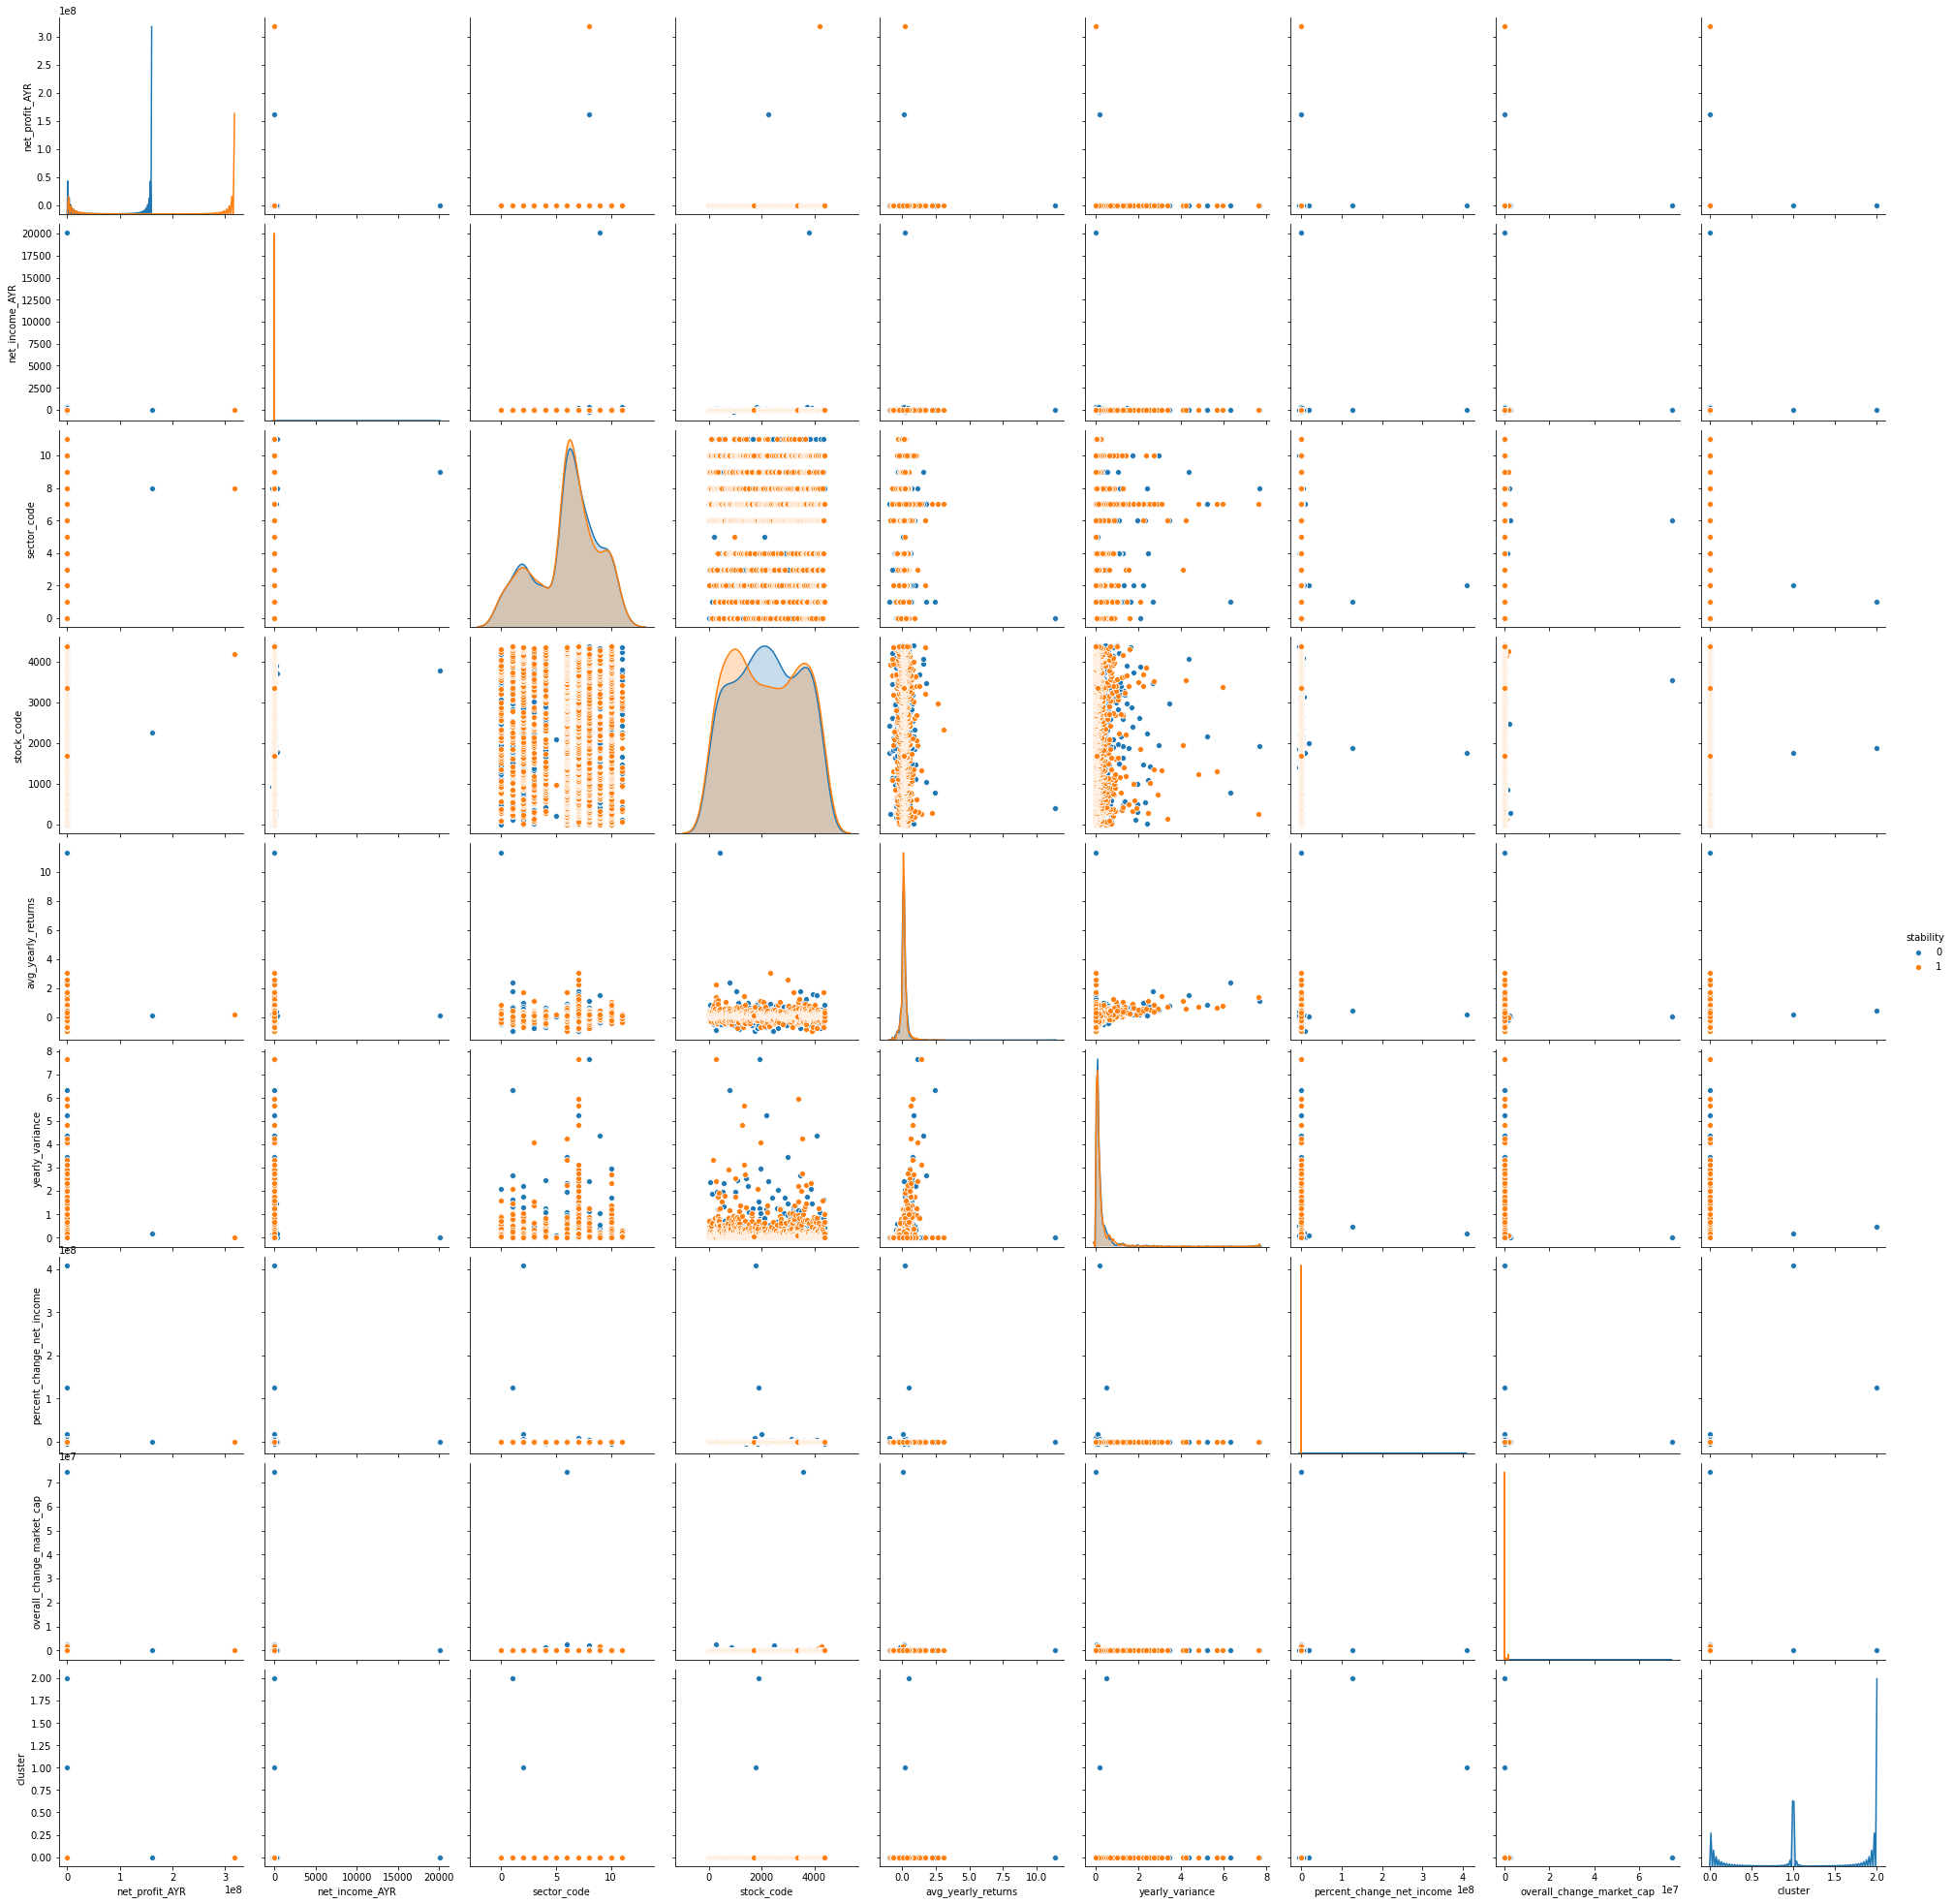

In [0]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

sns.pairplot(stock_data, hue="stability", size=3)
plt.show()

##Determine number of estimators : Determine the number of decision trees that we will be using. 

In [0]:
Y_estimator = stock_data['stability']
X_estimator = stock_data[['net_profit_AYR','net_income_AYR','sector_code','stock_code','yearly_variance','percent_change_net_income','overall_change_market_cap']]

In [0]:
x_train_estimator, x_test_estimator, y_train_estimator, y_test_estimator = train_test_split(X_estimator, Y_estimator, test_size=0.2, random_state=1)

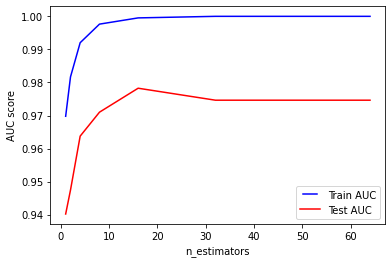

In [0]:
from sklearn.metrics import roc_curve, auc

n_estimators = [1, 2, 4, 8, 16, 32, 64]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(x_train_estimator, y_train_estimator)
   train_pred_estimator = rf.predict(x_train_estimator)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_estimator, train_pred_estimator)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test_estimator)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_estimator, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

##Random Forest Per Sector

In [0]:
results = []
for sector in top_sectors:
  
  temp_stock_data = stock_data.copy()
  temp_stock_data = temp_stock_data[temp_stock_data['sector_code'] == sector]
  
  Y = temp_stock_data['stability']
  #X = stock_data[['cluster', 'percent_change_net_income', 'avg_yearly_returns', 'yearly_variance', 'sector_code', 'net_profit_AYR']]
  #X= stock_data[['percent_change_net_income', 'avg_yearly_returns', 'yearly_variance', 'net_profit_AYR','sector_code','stock_code']]
  X = temp_stock_data[['net_profit_AYR','net_income_AYR','sector_code','stock_code','yearly_variance','percent_change_net_income','overall_change_market_cap']]
  
  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

  clf = RandomForestClassifier(max_depth=2, random_state=0)
  clf.fit(X, Y)

  estimator = clf.estimators_[16]

  feature_cols=['net_profit_AYR','net_income_AYR','sector_code','stock_code','yearly_variance','percent_change_net_income','overall_change_market_cap']
  from sklearn.tree import export_graphviz
  from sklearn.externals.six import StringIO  
  from IPython.display import Image  
  import pydotplus

  dot_data = StringIO()
  export_graphviz(estimator, out_file=dot_data, rounded=True, feature_names = feature_cols,class_names=['0','1'], precision = 2)
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
  graph.write_png('stocks_random_forest' + str(sector) + '.png')
  
  Image(graph.create_png())

  predictions = clf.predict(x_test)

  score = clf.score(x_test, y_test)
  results.append([sector, graph, score])
  

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


Sector 6
0.8961038961038961


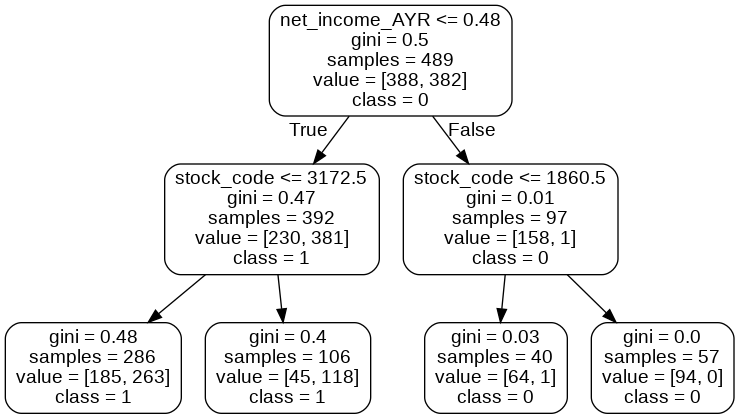

In [0]:
print("Sector", results[0][0])
print(results[0][2])
Image(results[0][1].create_png())

Sector 7
0.8554216867469879


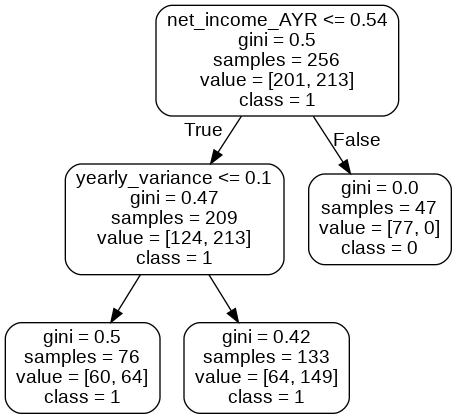

In [0]:
print("Sector", results[1][0])
print(results[1][2])
Image(results[1][1].create_png())

Sector 8
0.8813559322033898


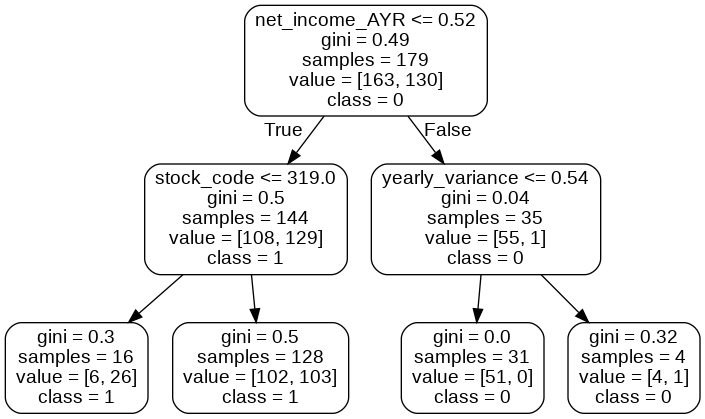

In [0]:
print("Sector", results[2][0])
print(results[2][2])
Image(results[2][1].create_png())

Sector 10
0.864406779661017


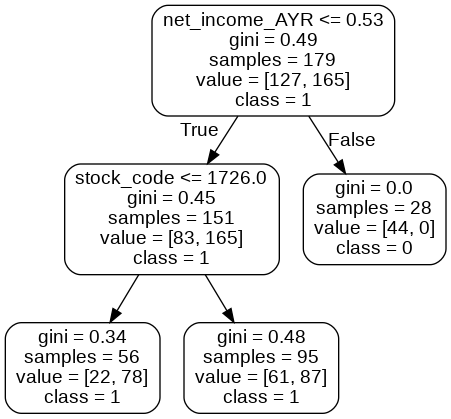

In [0]:
print("Sector", results[3][0])
print(results[3][2])
Image(results[3][1].create_png())

##Random Forest (all sectors) 

In [0]:
Y = stock_data['stability']
X = stock_data[['net_profit_AYR','net_income_AYR','sector_code','stock_code','yearly_variance','percent_change_net_income','overall_change_market_cap']]
#X = stock_data[['cluster', 'percent_change_net_income', 'avg_yearly_returns', 'yearly_variance', 'sector_code', 'net_profit_AYR']]
#X= stock_data[['percent_change_net_income', 'avg_yearly_returns', 'yearly_variance', 'net_profit_AYR','sector_code','stock_code']]


In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [0]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
estimator = clf.estimators_[16]

In [0]:
feature_cols=['net_profit_AYR','net_income_AYR','sector_code','stock_code','yearly_variance','percent_change_net_income','overall_change_market_cap']

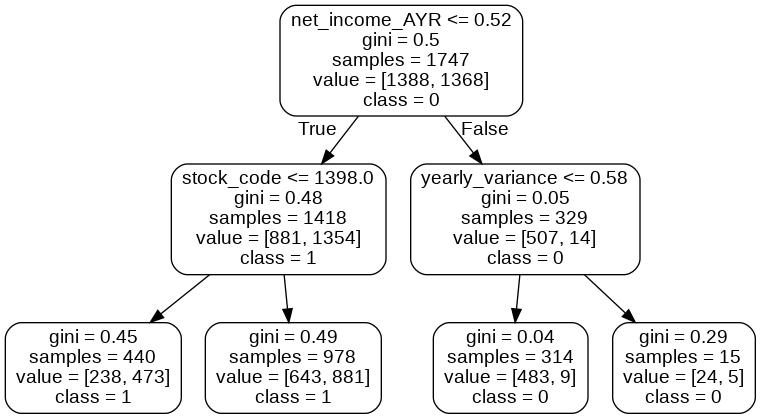

In [0]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data, rounded=True, feature_names = feature_cols,class_names=['0','1'], precision = 2)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('stocks_random_forest.png')
Image(graph.create_png())

In [0]:
predictions = clf.predict(x_test)

In [0]:
score = clf.score(x_test, y_test)
print(score)

0.8894927536231884


##Data Narrative and Insights

Because Random Forest uses multiple Decision Trees to classify, we used the same dataset and selected features from the Decision Tree assignment to conduct multivariate analysis and Random Forest (per sector and as a whole). 

When running multivariate analysis using pair plots on stability (our class), we noticed a couple of relationships between the two classes. Generally, there was a specific range of values for each feature in which a stock was unstable or stable (0 or 1). If we look at stock_code and avg_yearly_returns, there is a general range and concentration of where stable stocks are. And the unstable stocks are outside of the concentration, clear for labeling. This repetitive pattern shows that there is a clear complex distinction between each stocks stability. Hence when looking back at logisitic regression, obviously there is a relationship between the features to distinguish the classes but logistic regression's model isn't as complex to find those relationships. This confirms why  Decision Trees and Random Forest excel in classifying this form of data.

After this, we began the process of running Random Forest with our dataset and features. Before we could do this, we needed to determine the number of Decision Trees to use in our Random Forest classifier. The technique suggested to us was to run the algorithm on different estimators and see with which number of estimators it did well and where it began to perform worse after each iteration. Sixteen was the best estimator for our dataset. 

Our accuracy was lower for per sector because there was a lot less data for the Random Forest algorithm to randomly sample and classify the data on. As a whole, the Random Forest classifier did best due to their being a lot more data. But it didn't perform as well as it did in a single Decision Tree Algorithm. This maybe that the random sampling caused the gini scores to be lower. 

##Impact on Project

The inference that we can make is that we have a promising dataset, Even though the inital models that we ran on it, resulted in poor preformance. The Decision tree and Random Forrest models were able to make accurate predictions above 80%. These models show us that even though these are simple models, we can use the results to predict with high accuracy if a stock is going to be a good long term investment or not. 

#Reference

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c

https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

https://medium.com/@purnasaigudikandula/exploratory-data-analysis-beginner-univariate-bivariate-and-multivariate-habberman-dataset-2365264b751